# Data Description

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue.

# Import Required Library

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [101]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/DSData/raw/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Through the link - we have pulled the dataset from github. Also, we have a unnamed column in the dataset - So we will change the column in next set.

In [102]:
df=df.rename(columns={"Unnamed: 0": "Serial No"}) 
df.head()

,Serial No,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


We have renamed the column in the dataset

In [103]:
df.dtypes

Serial No      int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

We have a five columns in numeric value.

In [104]:
df.shape

(200, 5)

We have a 200 rows and 5 column in the dataset.

In [105]:
df.isnull().sum()

Serial No    0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Based on the above info - We have zero null value in the dataset. However, we will visualize and see the output through heatmap in the next step

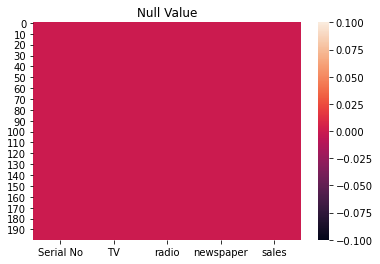

In [106]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Describe Dataset

In [107]:
#Statistical Summary
df.describe()

,Serial No,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


We have a outlier and skewness. So we will check in further step

# Correlation

In [108]:
df.corr()

,Serial No,TV,radio,newspaper,sales
Serial No,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Correlation using heatmap

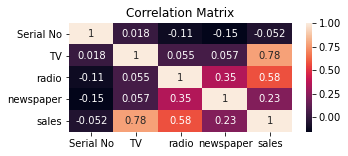

In [109]:
corr_mat=df.corr()

plt.figure(figsize=[5,2])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Here, we can leave the "serial No" column only because that is not a data. That is just a serial count(no of rows).

Also, we have a highly positive sign with TV(78%) and second with Radio(58%) and last one have a positive with newspaper(23%).

# Outlier Checking 

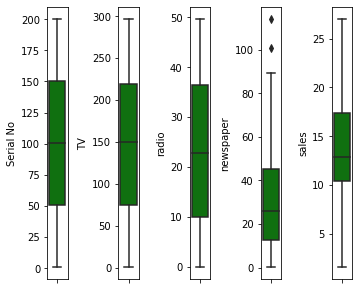

In [110]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In the above - we have an outlier in one columns(Newspaper) which is near with whisker but we will rectify in further step

# Checking Skewness

In [111]:
df.skew()

Serial No    0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

From the above info - we can see the skewness in the dataset only on newspaper.

Also, We can consider the -/+.5 is standard

# Normal Distribution Curve

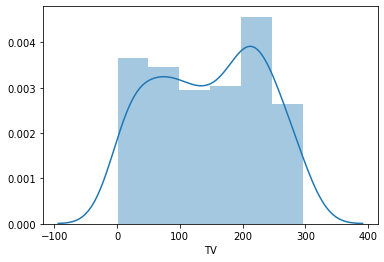

In [112]:
A=sns.distplot(df["TV"])

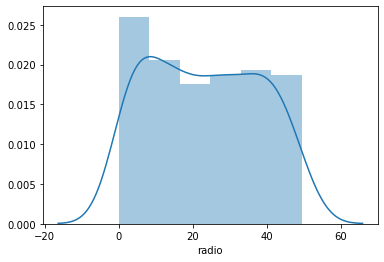

In [113]:
B=sns.distplot(df["radio"])

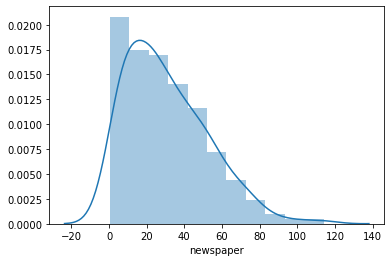

In [114]:
C=sns.distplot(df["newspaper"])

The data is normalized because the box build is out of normalized curve. However, TV & Radio is near to curve but the Newspaper have a little more distanace from the curve.

Hence, we will consider the newspaper column having a skewness.

# Data Cleaning

# Removing Outlier

In [115]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(200, 5)

In [116]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [117]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 5)
(198, 5)


In [120]:
Loss_percentage=(200-198)/200*100
print(Loss_percentage)

1.0


In [130]:
X=df.drop("sales",axis=1)
Y=df["sales"]

# Data Transform for Remove Skewness

In [131]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF

array([[-2.07937596,  0.94867429,  0.96224689,  1.51433531],
       [-2.03292263, -1.19131426,  1.0401788 ,  0.78768252],
       [-1.990711  , -1.6477566 ,  1.37070964,  1.51699753],
       [-1.95139683,  0.14102023,  1.14238689,  1.21465643],
       [-1.91424742,  0.45271493, -0.74865064,  1.21170398],
       [-1.87880665, -1.82382233,  1.51501853,  1.66502354],
       [-1.8447658 , -1.00249116,  0.69372704, -0.1077535 ],
       [-1.81190337, -0.210275  , -0.10158544, -0.84409341],
       [-1.7800535 , -1.82609501, -1.63345378, -2.13259669],
       [-1.74908785,  0.64764492, -1.56676988, -0.22900395],
       [-1.71890445, -0.88377378, -1.20298758, -0.07226156],
       [-1.68942058,  0.79708355,  0.18072579, -1.60261898],
       [-1.66056789, -1.52641627,  0.81900563,  1.42512925],
       [-1.63228912, -0.48036844, -1.02813642, -1.22982506],
       [-1.60453563,  0.69106577,  0.6992403 ,  0.81860579],
       [-1.57726567,  0.60295713,  1.45770359,  1.04432344],
       [-1.55044308, -0.

In [132]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)
x

array([[-2.07937596,  0.94867429,  0.96224689,  1.51433531],
       [-2.03292263, -1.19131426,  1.0401788 ,  0.78768252],
       [-1.990711  , -1.6477566 ,  1.37070964,  1.51699753],
       [-1.95139683,  0.14102023,  1.14238689,  1.21465643],
       [-1.91424742,  0.45271493, -0.74865064,  1.21170398],
       [-1.87880665, -1.82382233,  1.51501853,  1.66502354],
       [-1.8447658 , -1.00249116,  0.69372704, -0.1077535 ],
       [-1.81190337, -0.210275  , -0.10158544, -0.84409341],
       [-1.7800535 , -1.82609501, -1.63345378, -2.13259669],
       [-1.74908785,  0.64764492, -1.56676988, -0.22900395],
       [-1.71890445, -0.88377378, -1.20298758, -0.07226156],
       [-1.68942058,  0.79708355,  0.18072579, -1.60261898],
       [-1.66056789, -1.52641627,  0.81900563,  1.42512925],
       [-1.63228912, -0.48036844, -1.02813642, -1.22982506],
       [-1.60453563,  0.69106577,  0.6992403 ,  0.81860579],
       [-1.57726567,  0.60295713,  1.45770359,  1.04432344],
       [-1.55044308, -0.

# Finding the best Random State for Linear Reqression

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25,random_state=i)
    LR =LinearRegression()
    LR.fit(x_train,Y_train)
    pred=LR.predict(x_train)
    predrf=LR.predict(x_test)
    R2 = r2_score(Y_test, predrf)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 93.77908623980129 on Random state 13


We have a best accuracy is 94% and RS is 13. We can use this random state for train_test split.

# Creating Train-Test Split

In [141]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25,random_state=13)

# Cross-Validation of the Model

In [160]:
RX = r2_score(Y_train, pred)
RY = r2_score(Y_test, predrf)

from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score=cross_val_score(LR,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"Cross Validation Score of {j} is :",cv_mean*100)

Cross Validation Score of 2 is : 88.70253267919482
Cross Validation Score of 3 is : 89.97214482695925
Cross Validation Score of 4 is : 89.56922491130904
Cross Validation Score of 5 is : 89.53473674194841
Cross Validation Score of 6 is : 89.89475213938137
Cross Validation Score of 7 is : 89.41723706624096
Cross Validation Score of 8 is : 89.1699359391172
Cross Validation Score of 9 is : 89.33665603725781


Based on the above CV score there is no much impact on CV score. Hence I am choosing the cv=5

Here, we have facing the over fitting and underfitting problem by checking the training and testing score

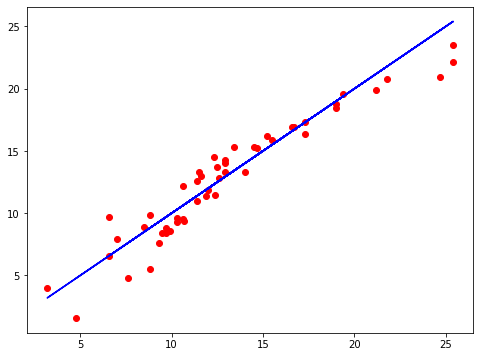

In [167]:
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test,y=predrf,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.show()

Best fit line is touching the most of the dot. So, we can consider best fit of our model.

# Regularization

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [175]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
LS=Lasso()
clf=GridSearchCV(LS,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [186]:
LS=Lasso(alpha=.1,random_state=0)
LS.fit(x_train,Y_train)
LS.score(x_train,Y_train)
predict=LS.predict(x_test)
ls=r2_score(Y_test,predict)
print("Lasso Score :",ls*100)

cv_score=cross_val_score(LS,x,Y,cv=5)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

Lasso Score : 91.57856088638835
CV Score : 89.76953137375197


# Ensemble Technique:

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
RF=RandomForestRegressor()
clf=GridSearchCV(RF,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [183]:
RF=RandomForestRegressor(criterion="mae",max_features="auto")
RF.fit(x_train,Y_train)
RF.score(x_train,Y_train)
pred=LS.predict(x_test)
RFS=r2_score(Y_test,pred)
print("R2 Score :",RFS*100)

rfs=cross_val_score(RF,x,Y,cv=5)
rfc=rfs.mean()
print("CV Score :",rfc*100)

R2 Score : 91.57856088638835
CV Score : 97.11042511130208


We are getting good accuracy & cross validation score with minimal score.

# Model Saving

In [187]:
import pickle
filename='Advertising.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [188]:
Loaded_load = pickle.load(open('Advertising.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.9771933318074678


In [191]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Predicted,12.287000,9.148000,10.089000,8.225000,7.384000,22.434000,12.231000,24.498000,6.294000,18.352000,...,12.671000,10.49500,15.514000,12.110000,11.714000,12.204000,14.348000,10.855000,23.000000,5.6570
Original,13.075907,5.849108,8.779295,8.730276,6.779077,20.636771,14.500343,22.058354,9.689992,17.284716,...,13.527148,9.67006,15.843141,11.559538,11.500647,15.194265,14.030325,9.734637,20.927071,2.1404


We have a the outcome for this model